In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
iris.data.shape

(150, 4)

In [3]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


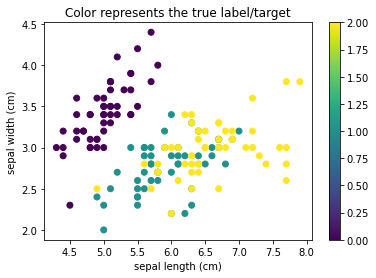

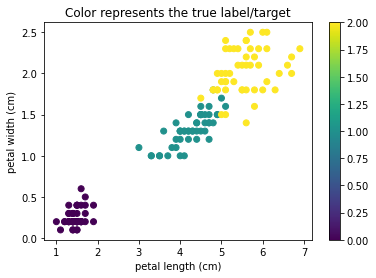

In [4]:
plt.figure()
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=df.Target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Color represents the true label/target')
plt.colorbar()
plt.figure()
plt.scatter(df['petal length (cm)'],df['petal width (cm)'], c=df.Target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Color represents the true label/target')
plt.colorbar()

# Correlation Formula
$$r=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2 \sum(y_i-\bar{y})^2}$$

<AxesSubplot:>

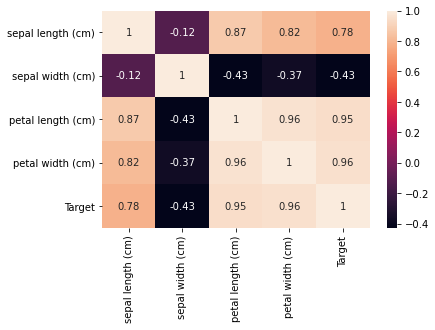

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

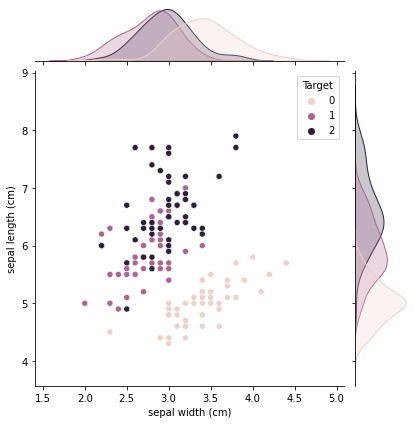

In [6]:
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)', hue='Target', data=df)

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(df.drop('Target', axis=1))
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1','PC2','PC3','PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


Text(0, 0.5, 'Proportion of Variance Explained')

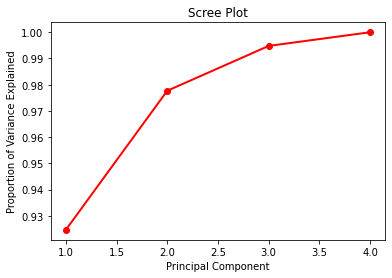

In [8]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

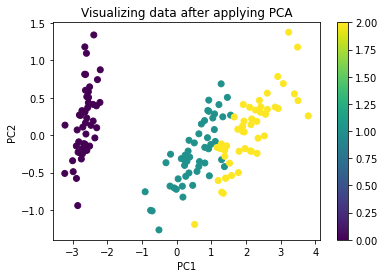

In [9]:
plt.figure()
plt.scatter(df_pca['PC1'],df_pca['PC2'], c=df.Target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualizing data after applying PCA')
plt.colorbar()

### Task:01 After normalization of the data, apply PCA
### Task:02 After standardization of the data, apply PCA
### Analyze and compare the results

# Concatenation

In [10]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

## Row wise concatenation (axis=0). This can be used in situations when we have two different files storing the same attributes or information. In one file, the data of 50% clients is stored. In the other file, the data of rest of the 50% clients is stored. For processing of all the clients data, we first need to concatenate these two files. As a result, after concatenation, the number of data points (no of rows in the dataframe) will increase. 

In [11]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print('df1: \n',df1); 
print('df2: \n',df2); 
print('After Concatenation: \n', pd.concat([df1, df2]))

df1: 
     A   B
1  A1  B1
2  A2  B2
df2: 
     A   B
3  A3  B3
4  A4  B4
After Concatenation: 
     A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## Column wise concatenation (axis=1). This can be used in situations when we have two different files storing the different attributes for the same clients in the same order. In one file, 50% of the attributes are stored. In the other file, rest of the 50% attributes are stored. For processing of all the attributes for each clietn, we first need to concatenate these two files. As a result, after concatenation, the number of attributes (no of columns in the dataframe) will increase. 

In [12]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print('df3: \n', df3); 
print('df1: \n', df4); 
print('After Concatenation: \n', pd.concat([df3, df4], axis=1))

df3: 
     A   B
0  A0  B0
1  A1  B1
df1: 
     C   D
0  C0  D0
1  C1  D1
After Concatenation: 
     A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


# check indexing 

In [13]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print('x:\n',x); print('y:\n',y); 
print('After concatenation: \n',pd.concat([x, y]))

x:
     A   B
0  A0  B0
1  A1  B1
y:
     A   B
0  A2  B2
1  A3  B3
After concatenation: 
     A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [14]:
print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


# Row wise concatenation with different attributes in each file!

In [15]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [16]:
print(pd.concat([df5, df6], join='inner')) # intersection of two files

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


# Merge and Joins

Merging two files based on primary key attribute. 
1) one-to-one

2) one-to-many or many-to-one

3) many-to-many

### 1) one-to-one

In [17]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [28]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### 2)one-to-many or many-to-one

In [30]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


### 3) many-to-many

In [20]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## right or left merge

In [21]:
print(pd.merge(df1, df2, on='employee', how='right'))

  employee        group  hire_date
0     Lisa  Engineering       2004
1      Bob   Accounting       2008
2     Jake  Engineering       2012
3      Sue           HR       2014


## if the names of primary key columns are different in two dataframes

In [22]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


## By default merge activates inner join: intersection of two dataframes or datasets 

In [23]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],'drink': ['wine', 'beer']}, columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


## outer join: union of two dataframes or datasets

In [24]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [25]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## if more than one columns have similar names in the two dataframes

In [26]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="rank"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
  name_x  rank name_y
0    Bob     1   Jake
1   Jake     2    Sue
2   Lisa     3    Bob
3    Sue     4   Lisa


# Grouping and aggregation